# **Lab 6: Convolutional Neural Networks**

---
NOTE: This is a lab project accompanying the following book [MLF] and it should be used together with the book.

[MLF] *H. Jiang*, "[Machine Learning Fundamentals: A Concise Introduction](http://wiki.eecs.yorku.ca/user/hj/research:mlfbook)", Cambridge University Press, 2021.  ([bibtex](http://www.cse.yorku.ca/~hj/mlf-jiang.bib))

---

The purpose of this lab is to explore more complex structures in neural networks beyond simple fully-connected networks. In particular, we focus on deep convolutional nerual networks (CNNs) for image classification as CNNs have become the dominant model for many computer vision tasks. Instead of implementing CNNs from scratch as what has been done in the previous Labs, we introduce some popular deep learning toolkits, such as *Tensorflow* and *Pytorch*, and use some examples to show how to use these toolkits to conveniently build various CNN structures and efficiently train/evaluate them with available training/test data. 

Prerequisites: N/A

The most important feature in these popular deep learning toolkits (either *Tensorflow* or *Pytorch*) is to provide some flexible ways for us to specify various networks structures. These toolkits usually come up with many different syntaxes from various levels for this purpose. Some low-level syntaxes allow us to conveniently customize neural networks  in any way we prefer while other high-level syntaxes offer legible and flexible interfaces to configure  popular network structures in the literature. These toolkits allow us to directly use many popular building blocks introduced in [MLF] without reinventing the wheel, such as full connection, convolution, activation, softmax, attension, feedback and normalization layers. On the other hand, it also provides nice interfaces for us to implement any new modules. 

Another advantage to use these toolkits is that they come up with automatic differentiation (AD) module so that we do not need to explicitly implement error back-propagation. The learning process is almost totally automatic as long as we specify some key ingredients, such as a loss function, an optimization algorithm and relevant hyperparameters. Finally, these toolkits also provide a full support to allow us to flexibly switch hardware devices between CPUs, GPUs and even TPUs for the training/testing processes. 

In this Lab, we only introduce how to use the high-level *Keras* style syntax to build deep convolutional neural networks for image classification tasks. When we use the *Keras* interface to build any complex neural networks, it usually consists of the following three steps:

1.   **Define**: we use some highly legible syntax to clearly define the structure of neural networks in a layer by layer manner. In this step, we need to specify all network details in a static structure. 

2.   **Compile**: we compile the previously defined static network by associating it with some dynamic components, such as a loss function, an optimizer along with its hyperparameters, a hardware device to be used (CPUs or GPUs), an evaluation matric, etc. 

3.   **Fit**: we fit the compiled model to the available training data (as well as the corresponding target labels). It will run the specified optimizer and use the automatically derived gradients from AD to learn the model on the specified hardware device. 

In the following, we will use several examples to show how to do these three steps for convolutional neural networks using *Tensorflow* and *Pytorch*. 

## **I. Using TensorFlow**

### **Example 6.1:**

*Use Tensorflow to re-implement the fully-connected neural networks and compare it with various implementations in last Lab in terms of classification accuracy and running speed.* 

Here we can use an integer (between 0 and 9) as the target lable for each image. For this case, we need to specify the CE loss function as "*sparse_categorical_crossentropy*" in *Tensorflow*. If we use the one-hot vector as the target label for each image, we need to specify the CE loss function as "*categorical_crossentropy*" in *Tensorflow*. Note that *Tensorflow* uses GPUs by default as long as  GPUs are available.

In [1]:
#link my Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install python_mnist

!pip install python_mnist

In [7]:
#load MINST images

from mnist import MNIST
import numpy as np

mnist_loader = MNIST('/content/drive/My Drive/Colab Notebooks/datasets/MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
X_train = np.array(train_data, dtype='float')/255.0 # norm to [0,1]
y_train = np.array(train_label, dtype='short')
X_test = np.array(test_data, dtype='float')/255.0 # norm to [0,1]
y_test = np.array(test_label, dtype='short')

#reshape each input vector (784) into a 28*28*1 image 
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_test = np.reshape(X_test, (-1,28,28,1))

# convert MNIST labels into 10-D one-hot vectors 
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1
Y_test = np.zeros((y_test.size, y_test.max()+1))
Y_test[np.arange(y_test.size),y_test] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,) (60000, 10) (10000, 10)


In [4]:
# use tensorflow to implement a fully-connected neural networks (same structure as Lab5)
#
# use integers as target labels and specify CE loss as "sparse_categorical_crossentropy"

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="sparse_categorical_crossentropy",      # CE loss for integer label 
              optimizer=keras.optimizers.SGD(learning_rate=1e-1),
              metrics=["accuracy"])

# fit to training data to learn the model
history = model.fit(X_train, y_train, epochs=10,          # y_train: integer labels
                    validation_data=(X_test, y_test))     # y_test: integer labels

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2488 - accuracy: 0.9258 - val_loss: 0.1248 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0696 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0672 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0590 - val_accuracy:

In [9]:
# use tensorflow to implement a fully-connected neural networks
# use one-hot target labels and specify CE loss as "categorical_crossentropy"

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras  (same network structure as Lab5)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="categorical_crossentropy",      # CE loss for one-hot vector label 
              optimizer=keras.optimizers.SGD(learning_rate=1e-1),
              metrics=["accuracy"])

# fit to training data to learn the model  
history = model.fit(X_train, Y_train, epochs=10,        # Y_train: one-hot vector labels  
                    validation_data=(X_test, Y_test))   # Y_test: one-hot vector labels

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9258 - val_loss: 0.1248 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0696 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0672 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0590 - val_accuracy:

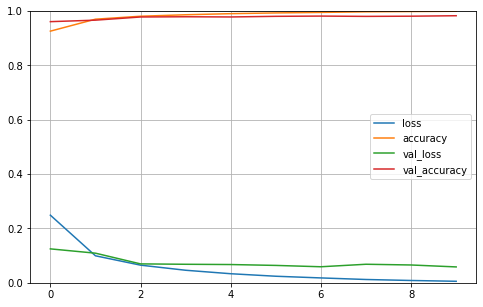

In [10]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dense_8 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [107]:
# show the GPU type used in the above computation

!nvidia-smi

Thu Feb  3 21:01:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |   6929MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Example 6.2:**

*Use Tensorflow to implement the convolutional neural networks as structrued on page 200, and evaluate its performance using the MNIST data set and compare it with the fully-connected neural networks in the previous example.* 


In [12]:
# use tensorflow to implement a convolutional neural network on page 200

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', \
                        padding='same', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=7744, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile model by attaching loss/optimizer/metric components
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-2),
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 11ms/step - loss: 0.2328 - accuracy: 0.9291 - val_loss: 0.0840 - val_accuracy: 0.9732
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0643 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0348 - val_accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0351 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0334 -

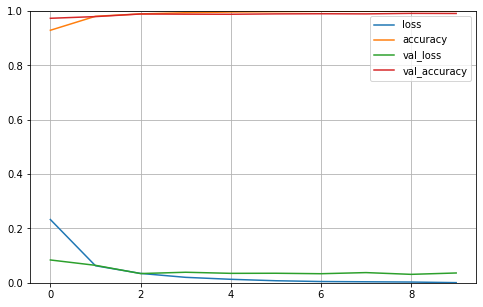

In [13]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

From the above results, we can see that this simple CNN yields better performance than FCNNs as its best classification accuracy on the test set is 99.13%. 

In the above implementation, *padding='same'* indciates that proper zero-paddings are added prior to convolution so that the generated outputs have the same dimensions as its inputs. This is clear from the following model summary:

In [36]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 12544)             0         
                                                                 
 dense_33 (Dense)            (None, 7744)              97148480  
                                                     

### **Example 6.3:**

*Use Tensorflow to implement a deeper convolutional neural networks as in Figure 8.23 on page 169, and evaluate its performance using the MNIST data set.*  


In [14]:
# use tensorflow to implement a convolutional neural networks in Figure 8.23 on page 169

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', \
                        padding='same', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=4096, activation='relu'),
    keras.layers.Dense(units=4096, activation='relu'),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=5e-2),
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3161 - accuracy: 0.8964 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0433 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0258 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0279 - val_accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0378 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0273 - val_a

In [15]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

## **II. Using Pytorch**

In general, *Pytorch* follows a similar pipeline of model construction as *Tensorflow*. Refer to an online [Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for more details. In the following examples, we use a keras-style package for Pytorch, namely *torchkeras*. As a result, we can similarly follow the above three steps in building CNNs using *Pytorch*. 

### **Example 6.4:**

*Use Pytorch to implement the convolutional neural networks as Example 6.2, and evaluate its performance using the MNIST data set.* 


In [ ]:
# install keras packages for pytorch

!pip install -U torchkeras 

In [94]:
# Convert training/test data from numpy arrays to pytorch tensors/datasets
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
 
X_train_ts = torch.Tensor(X_train.reshape(-1,1,28,28))
train_dataset = torch.utils.data.TensorDataset(X_train_ts, torch.Tensor(y_train).long())
X_test_ts = torch.Tensor(X_test.reshape(-1,1,28,28))
test_dataset = torch.utils.data.TensorDataset(X_test_ts, torch.Tensor(y_test).long())

dl_train =  torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
dl_valid =  torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(len(dl_train))
print(len(dl_valid))

1875
313


In [102]:
# use pyorch to implement a convolutional neural networks on page 200
import torch 
from torch import nn

# define CNN structure and its forward pass layer-by-layer 
class CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size = 3),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 3),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size = 3),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Flatten(),
            nn.Linear(7744,7744),
            nn.ReLU(),
            nn.Linear(7744,128),
            nn.ReLU(),
            nn.Linear(128,10)
            ]
        )
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [103]:
# running CNNs on CPUs (by default)
import torchkeras
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true.numpy(),y_pred_cls.numpy())

model = torchkeras.Model(CnnModel())
model.summary(input_shape=(1,28,28))

# compile the model by attaching various dynamic components 
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy})

# train CNNs by fitting to the training data 
dfhistory = model.fit(10,dl_train = dl_train, dl_val=dl_valid, log_step_freq=100) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3           [-1, 64, 22, 22]          36,928
         MaxPool2d-4           [-1, 64, 11, 11]               0
           Flatten-5                 [-1, 7744]               0
            Linear-6                 [-1, 7744]      59,977,280
              ReLU-7                 [-1, 7744]               0
            Linear-8                  [-1, 128]         991,360
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 61,025,674
Trainable params: 61,025,674
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.002991
Forward/backward pass size (MB): 0.920975
Params size (MB): 23

In [105]:
# Explicitly specify device and running CNNs on GPUs
import torchkeras
from sklearn.metrics import accuracy_score

model = torchkeras.Model(CnnModel())
model.summary(input_shape=(1,28,28))

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true.cpu().numpy(),y_pred_cls.cpu().numpy())
    # .cpu() transfer the data from GPUs back to CPUs 

# compile the model by attaching various dynamic components 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # using GPU if available 
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.SGD(model.parameters(), lr=0.1),
             metrics_dict={"accuracy":accuracy},device = device)
              # explicitly specify GPUs as device 

# train CNNs by fitting to the training data 
dfhistory = model.fit(10,dl_train = dl_train, dl_val=dl_valid, log_step_freq=900) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3           [-1, 64, 22, 22]          36,928
         MaxPool2d-4           [-1, 64, 11, 11]               0
           Flatten-5                 [-1, 7744]               0
            Linear-6                 [-1, 7744]      59,977,280
              ReLU-7                 [-1, 7744]               0
            Linear-8                  [-1, 128]         991,360
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 61,025,674
Trainable params: 61,025,674
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.002991
Forward/backward pass size (MB): 0.920975
Params size (MB): 23

## **Exercises**

### **Problem 6.1:**

Use *Tensorflow* or *Pytorch* to implement a CNN model as in Figure 8.23 on page 169 and evaluate it on [the CIFAR10 data set](https://www.cs.toronto.edu/~kriz/cifar.html). Vary the structures in this CNN model slightly to see whether you can further improve the performance on the CIFAR10 test set. 

### **Problem 6.2:**

Use *JAX* and its automatic differenttiation to implement CNNs from scratch. Use your implementation to build the same CNN model as in Example 6.2 and evaluate it on the MNIST data set. Compare your *JAX* implementation with *TensorFlow* or *Pytorch* in terms of classification accuracy and running speed. 